In [38]:
from cobra.io import read_sbml_model
model = read_sbml_model('iCGB21FR.xml')

SBML package 'layout' not supported by cobrapy, information is not parsed
https://juser.fz-juelich.de/record/188973 does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id


In [137]:
model.annotation

{'pubmed': '32140378', 'taxonomy': '196627'}

In [136]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ca2_e,EX_ca2_e,0.03095,0,0.00%
cl_e,EX_cl_e,0.03499,0,0.00%
cu2_e,EX_cu2_e,0.01952,0,0.00%
fe2_e,EX_fe2_e,0.02221,0,0.00%
fe3_e,EX_fe3_e,0.02221,0,0.00%
glc__D_e,EX_glc__D_e,10,6,100.00%
h_e,EX_h_e,10,0,0.00%
k_e,EX_k_e,0.03173,0,0.00%
mg2_e,EX_mg2_e,0.05104,0,0.00%
mn2_e,EX_mn2_e,0.02258,0,0.00%


In [183]:
import html2text

model_notes = """
<notes>
    <body xmlns="http://www.w3.org/1999/xhtml">
        <h1>Model of <i>Corynebacterium glutamicum</i> ATCC 13032 (Bielefeld)</h1>
        <p>The bacterium <i>Corynebacterium glutamicum</i> can produce <span style="font-variant: small-caps;">l</span>-glutamic acid under certain growth conditions.
            <span style="font-variant: small-caps;">l</span>-glutamic acid is used as a flavor enhancer, food supplement, or primary chemical raw material.
            It, therefore, plays an essential economic role with an annual production of over 2&#189; million tons.
            Due to metabolic development, the product range of <i>C. glutamicum</i> has been expanded to include all biogenic amino acids, vitamins, and more.
            Previously published metabolic models of <i>C. glutamicum</i> have been supplemented with new metabolic data and expanded with data from new systems biology programs to result in this consensus model.
        </p>
    </body>
</notes>"""

print(html2text.html2text(model_notes))

# Model of _Corynebacterium glutamicum_ ATCC 13032 (Bielefeld)

The bacterium _Corynebacterium glutamicum_ can produce l-glutamic acid under
certain growth conditions. l-glutamic acid is used as a flavor enhancer, food
supplement, or primary chemical raw material. It, therefore, plays an
essential economic role with an annual production of over 2½ million tons. Due
to metabolic development, the product range of _C. glutamicum_ has been
expanded to include all biogenic amino acids, vitamins, and more. Previously
published metabolic models of _C. glutamicum_ have been supplemented with new
metabolic data and expanded with data from new systems biology programs to
result in this consensus model.




In [226]:
reaction_kegg_list = []

for reaction in model.reactions:
    
    reaction_kegg_list.append({"reaction_id":reaction.id, "reaction.annotation":reaction.annotation})

#     print(f"reaction.id: {reaction.id}")
#     print(f"reaction.name: {reaction.name}")
#     print(f"reaction.annotation: {reaction.annotation}")
        
#     for reactant in reaction.reactants:
#         print(f"reactant.id: {reactant.id}")
#         print(f"reactant.name: {reactant.name}")
#     print("\n")    

In [227]:
print(len(model.reactions))
len(reaction_kegg_list)

1539


819

In [250]:
model

Name,iCBG21FR
Memory address,234b4080550
Number of metabolites,1042
Number of reactions,1539
Number of genes,805
Number of groups,102
Objective expression,1.0*Growth - 1.0*Growth_reverse_699ae
Compartments,"cytosol, periplasm, extracellular space"


In [587]:

def getReactionToGeneAssociation():
    global reaction_to_gene_association
    for reaction in model.reactions:
        for gene in reaction.genes:
            reaction_to_gene_association[reaction.id] = gene.id
    return reaction_to_gene_association


def getGeneToReactionAssociation():
    global reaction_to_gene_association
    global gene_to_reaction_association

    for reaction_id, gene_id in reaction_to_gene_association.items():
        if gene_id not in gene_to_reaction_association:
            gene_to_reaction_association[gene_id] = [reaction_id]
        else:
            gene_to_reaction_association[gene_id].append(reaction_id)

    return gene_to_reaction_association

reaction_to_gene_association = {}
gene_to_reaction_association = {}

reaction_to_gene_association = getReactionToGeneAssociation()
gene_to_reaction_association = getGeneToReactionAssociation()



In [588]:
print(len(reaction_to_gene_association))
list(reaction_to_gene_association.items())[:3]

1077


[('2MAHMP', 'lcl_NC_006958_1_prot_WP_011015468_1_2761'),
 ('3MBt2pp', 'lcl_NC_006958_1_prot_WP_011013917_1_810'),
 ('3MBt4pp', 'lcl_NC_006958_1_prot_WP_011013917_1_810')]

In [589]:
print(len(gene_to_reaction_association))
list(gene_to_reaction_association.items())[:3]

556


[('lcl_NC_006958_1_prot_WP_011015468_1_2761', ['2MAHMP']),
 ('lcl_NC_006958_1_prot_WP_011013917_1_810',
  ['3MBt2pp',
   '3MBt4pp',
   'ACt2rpp',
   'ACt4pp',
   'BUTt2rpp',
   'BUTt4pp',
   'GLYCLTt4pp',
   'PACt3',
   'PNTOt2',
   'PPAt2pp',
   'PYRt2rpp',
   'PYRt4pp']),
 ('lcl_NC_006958_1_prot_WP_003859251_1_2275',
  ['3OXCOAT', 'ACACT1r', 'ACACT2r'])]

In [606]:
def getLenOfReactions(gene_to_reaction_association):
    temp_reactions = []
    for gene, reactions in gene_to_reaction_association.items():
        for reaction in reactions:
            if reaction not in temp_reactions:
                temp_reactions.append(reaction)
    return len(temp_reactions)    

gene_to_single_reaction_association = {}
gene_to_double_reaction_association = {}
gene_to_triple_reaction_association = {}
gene_to_quadruple_reaction_association = {}
gene_to_quintuple_reaction_association = {}
gene_to_sextuple_reaction_association = {}
gene_to_septuple_reaction_association = {}
gene_to_octuple_reaction_association = {}
gene_to_nonuple_reaction_association = {}
gene_to_decuple_reaction_association = {}
gene_to_many_reaction_association = {}

for gene, reactions in gene_to_reaction_association.items():
    
    if len(reactions) == 1:
        gene_to_single_reaction_association[gene] = reactions
    
    elif len(reactions) == 2:
        gene_to_double_reaction_association[gene] = reactions

    elif len(reactions) == 3:
        gene_to_triple_reaction_association[gene] = reactions
    
    elif len(reactions) == 4:
        gene_to_quadruple_reaction_association[gene] = reactions

    elif len(reactions) == 5:
        gene_to_quintuple_reaction_association[gene] = reactions

    elif len(reactions) == 6:
        gene_to_sextuple_reaction_association[gene] = reactions
    
    elif len(reactions) == 7:
        gene_to_septuple_reaction_association[gene] = reactions
     
    elif len(reactions) == 8:
        gene_to_octuple_reaction_association[gene] = reactions

    elif len(reactions) == 9:
        gene_to_nonuple_reaction_association[gene] = reactions

    elif len(reactions) == 10:
        gene_to_decuple_reaction_association[gene] = reactions

    else:
        gene_to_many_reaction_association[gene] = reactions

print(f"1:1 control: {len(gene_to_single_reaction_association)} genes controlling {getLenOfReactions(gene_to_single_reaction_association)} reactions")
print(f"1:2 control: {len(gene_to_double_reaction_association)} genes controlling {getLenOfReactions(gene_to_double_reaction_association)} reactions")
print(f"1:3 control: {len(gene_to_triple_reaction_association)} genes controlling {getLenOfReactions(gene_to_triple_reaction_association)} reactions")
print(f"1:4 control: {len(gene_to_quadruple_reaction_association)} genes controlling {getLenOfReactions(gene_to_quadruple_reaction_association)} reactions")
print(f"1:5 control: {len(gene_to_quintuple_reaction_association)} genes controlling {getLenOfReactions(gene_to_quintuple_reaction_association)} reactions")
print(f"1:6 control: {len(gene_to_sextuple_reaction_association)} genes controlling {getLenOfReactions(gene_to_sextuple_reaction_association)} reactions")
print(f"1:7 control: {len(gene_to_septuple_reaction_association)} genes controlling {getLenOfReactions(gene_to_septuple_reaction_association)} reactions")
print(f"1:8 control: {len(gene_to_octuple_reaction_association)} genes controlling {getLenOfReactions(gene_to_octuple_reaction_association)} reactions")
print(f"1:9 control: {len(gene_to_nonuple_reaction_association)} genes controlling {getLenOfReactions(gene_to_nonuple_reaction_association)} reactions")
print(f"1:10 control: {len(gene_to_decuple_reaction_association)} genes controlling {getLenOfReactions(gene_to_decuple_reaction_association)} reactions")

print(f"1:11+ control: {len(gene_to_many_reaction_association)} genes controlling {getLenOfReactions(gene_to_many_reaction_association)} reactions")



1:1 control: 368 genes controlling 368 reactions
1:2 control: 95 genes controlling 190 reactions
1:3 control: 35 genes controlling 105 reactions
1:4 control: 16 genes controlling 64 reactions
1:5 control: 9 genes controlling 45 reactions
1:6 control: 10 genes controlling 60 reactions
1:7 control: 5 genes controlling 35 reactions
1:8 control: 5 genes controlling 40 reactions
1:9 control: 5 genes controlling 45 reactions
1:10 control: 1 genes controlling 10 reactions
1:11+ control: 7 genes controlling 115 reactions


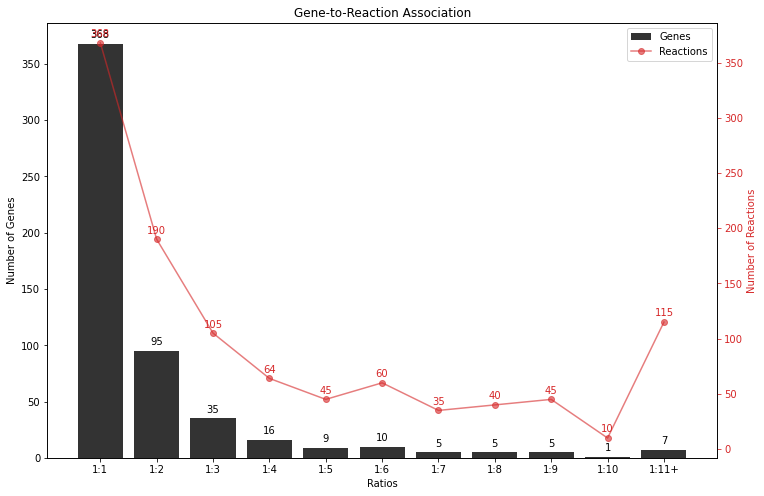

In [648]:
import matplotlib.pyplot as plt

control_ratios = ["1:1", "1:2", "1:3", "1:4", "1:5", "1:6", "1:7", "1:8", "1:9", "1:10", "1:11+"]
num_genes = [368, 95, 35, 16, 9, 10, 5, 5, 5, 1, 7]
num_reactions = [368, 190, 105, 64, 45, 60, 35, 40, 45, 10, 115]

fig, ax1 = plt.subplots(figsize=(12, 8))

color='black'
bars = ax1.bar(control_ratios, num_genes, color=color, alpha=0.8, label='Genes')
ax1.set_xlabel('Ratios')
ax1.set_ylabel('Number of Genes', color=color)
ax1.tick_params('y', colors=color)

for bar, value in zip(bars, num_genes):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height()+3.5, str(value),
             ha='center', va='bottom', color='black', fontweight='regular')

color = "tab:red"
ax2 = ax1.twinx()
lines = ax2.plot(control_ratios, num_reactions, color=color, marker='o', alpha=0.6, label='Reactions')
ax2.set_ylabel('Number of Reactions', color=color)
ax2.tick_params('y', colors=color)

# Adding labels for reaction values
for x, y, value in zip(ax2.get_xticks(), num_reactions, num_reactions):
    plt.text(x, y+3.5, str(value), ha='center', va='bottom', color=color, fontweight='regular')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Title and show plot
plt.title('Gene-to-Reaction Association')
plt.show()


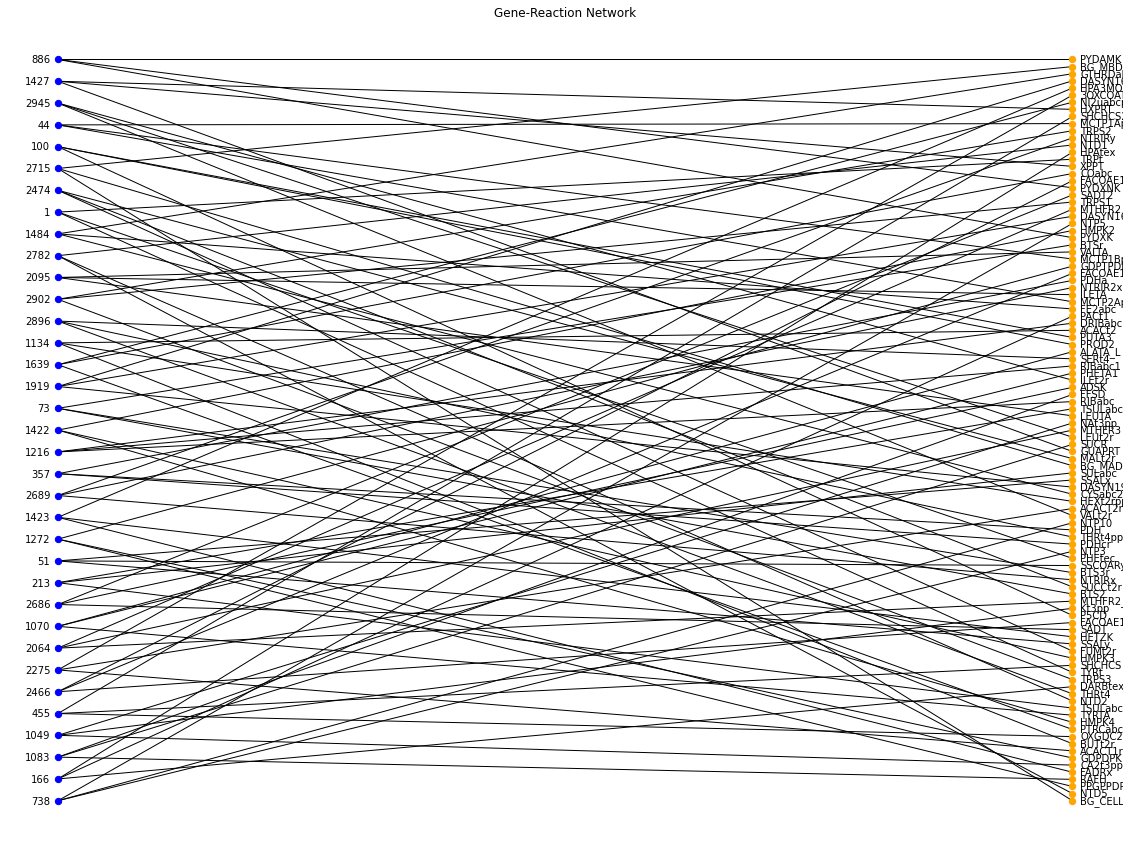

In [583]:
import matplotlib.pyplot as plt
import networkx as nx

def plotGeneReactionNetwork(gene_to_reaction_association):
    G = nx.Graph()
    fig, ax = plt.subplots(figsize=(20, 15))

    # Creating nodes
    for gene, reactions in gene_to_reaction_association.items():
        G.add_node(gene, bipartite=0)
    for reactions in gene_to_reaction_association.values():
        for reaction in set(reactions):
            G.add_node(reaction, bipartite=1)
    
    # Connecting edge
    for gene, reactions in gene_to_reaction_association.items():
        for reaction in set(reactions):
            G.add_edge(gene, reaction)

    gene_nodes = {node for node, data in G.nodes(data=True) if data['bipartite'] == 0}
    reaction_nodes = set(G) - gene_nodes

    pos = nx.bipartite_layout(G, gene_nodes, align='vertical', scale=1, aspect_ratio=1.33)
    
    # Drawing the connecting edge
    nx.draw(G, pos, with_labels=False, node_color="black", node_size=1)

    ## Drawing nodes
    nx.draw_networkx_nodes(G, pos, nodelist=gene_nodes, node_color='blue', node_size=40)    
    nx.draw_networkx_nodes(G, pos, nodelist=reaction_nodes, node_color='orange', node_size=40)

    ## Drawing labels
    gene_labels = {node: node.split("_")[-1] for node in gene_nodes}
    gene_label_pos = {node: (pos[node][0]- 0.01, pos[node][1]) for node in gene_nodes}
    nx.draw_networkx_labels(G, pos=gene_label_pos, labels=gene_labels, font_color='black', font_size=10, horizontalalignment='right', verticalalignment='center')
    reaction_labels = {node: node for node in reaction_nodes}
    reaction_label_pos = {node: (pos[node][0]+ 0.01, pos[node][1]) for node in reaction_nodes}
    nx.draw_networkx_labels(G, pos=reaction_label_pos, labels=reaction_labels, font_color='black', font_size=10, horizontalalignment='left', verticalalignment='center')

    plt.title('Gene-Reaction Network')
    plt.show()


plotGeneReactionNetwork(gene_to_triple_reaction_association)



Genes number: 16
reactions number: 64


In [261]:
model.reactions.get_by_id("AIRCr")

Reaction identifier,AIRCr
Name,Phosphoribosylaminoimidazole carboxylase
Memory address,0x234c4628910
Stoichiometry,air_c + co2_c <=> 5aizc_c + h_c 5-amino-1-(5-phospho-D-ribosyl)imidazole + CO2 <=> 5-amino-1-(5-phospho-D-ribosyl)imidazole-4-carboxylate + H+
GPR,lcl_NC_006958_1_prot_WP_003858249_1_691 or (lcl_NC_006958_1_prot_WP_003858249_1_691 and...
Lower bound,-1000.0
Upper bound,1000.0


In [262]:
model.genes.get_by_id("lcl_NC_006958_1_prot_WP_011265608_1_688")


Gene identifier,lcl_NC_006958_1_prot_WP_011265608_1_688
Name,G_lcl_NC_006958_1_prot_WP_011265608_1_688
Memory address,0x234c442d700
Functional,True
In 1 reaction(s),AIRCr


{'lcl_NC_006958_1_prot_WP_003855288_1_2949': ['2MAHMP', '2MAHMP', '3MBt2pp'], 'lcl_NC_006958_1_prot_WP_011013917_1_810': ['3MBt4pp'], 'lcl_NC_006958_1_prot_WP_003859251_1_2275': ['3OXCOAT']}


In [17]:
import cobra
from cobra.io import read_sbml_model
from cobra.flux_analysis import single_gene_deletion, double_gene_deletion, double_reaction_deletion


# OptKnock
gene_knockout_result = single_gene_deletion(model)
gene_knockout_result


,ids,growth,status
0,{lcl_NC_006958_1_prot_WP_011013993_1_917},0.000000e+00,optimal
1,{lcl_NC_006958_1_prot_WP_003855021_1_1078},5.706601e-01,optimal
2,{lcl_NC_006958_1_prot_WP_003856127_1_1475},-9.574772e-18,optimal
3,{WP_011013684_1},5.706601e-01,optimal
4,{lcl_NC_006958_1_prot_WP_011014434_1_1496},5.706601e-01,optimal
...,...,...,...
800,{lcl_NC_006958_1_prot_WP_011014305_1_1320},-4.768604e-31,optimal
801,{lcl_NC_006958_1_prot_WP_011014382_1_1422},5.706601e-01,optimal
802,{lcl_NC_006958_1_prot_WP_011013399_1_114},5.706601e-01,optimal
803,{lcl_NC_006958_1_prot_WP_011013984_1_906},5.706601e-01,optimal


In [ ]:
optknock_genes = cobra.flux_analysis.find_gene_knockout_strategies(gene_knockout_result)

In [ ]:
# Example: Double Gene Deletion (OptGene-like)
double_gene_knockout_result = double_gene_deletion(model)
optgene_genes = cobra.flux_analysis.find_gene_knockout_strategies(double_gene_knockout_result)

# Example: Double Reaction Deletion (OptCouple-like)
double_reaction_knockout_result = double_reaction_deletion(model)
optcouple_genes = cobra.flux_analysis.find_gene_knockout_strategies(double_reaction_knockout_result)

# Display the results
print("OptKnock Genes:", optknock_genes)
print("OptGene-like Genes:", optgene_genes)
print("OptCouple-like Genes:", optcouple_genes)


In [18]:
print('complete model: ', model.optimize())
with model:
    model.reactions.PFK.knock_out()
    print('pfk knocked out: ', model.optimize())

complete model:  <Solution 0.571 at 0x2513ef38e80>
pfk knocked out:  <Solution 0.386 at 0x2513ef38820>


In [186]:
for metabolite in model.genes.query('brnEF', 'name'):
    print(metabolite.name)

In [185]:
for gene in model.genes:
    print(gene.name)

G_lcl_NC_006958_1_prot_WP_011015468_1_2761
G_lcl_NC_006958_1_prot_WP_003855288_1_2949
G_lcl_NC_006958_1_prot_WP_011013917_1_810
G_lcl_NC_006958_1_prot_WP_003859251_1_2275
G_lcl_NC_006958_1_prot_WP_011015386_1_2669
G_lcl_NC_006958_1_prot_WP_003859243_1_2278
G_lcl_NC_006958_1_prot_WP_011265680_1_1044
G_lcl_NC_006958_1_prot_WP_011014966_1_2112
G_lcl_NC_006958_1_prot_WP_003857140_1_156
G_lcl_NC_006958_1_prot_WP_011015481_1_2778
G_lcl_NC_006958_1_prot_WP_003859586_1_2138
G_lcl_NC_006958_1_prot_WP_011015122_1_2318
G_lcl_NC_006958_1_prot_WP_011013682_1_467
G_lcl_NC_006958_1_prot_WP_011015295_1_2545
G_lcl_NC_006958_1_prot_WP_011013720_1_527
G_lcl_NC_006958_1_prot_WP_011013661_1_441
G_lcl_NC_006958_1_prot_WP_011014125_1_1074
G_lcl_NC_006958_1_prot_WP_080558827_1_1134
G_lcl_NC_006958_1_prot_WP_003863615_1_684
G_lcl_NC_006958_1_prot_WP_011013915_1_808
G_lcl_NC_006958_1_prot_WP_011013744_1_562
G_lcl_NC_006958_1_prot_WP_011014763_1_1832
G_lcl_NC_006958_1_prot_WP_003858695_1_1357
G_lcl_NC_006958_1_p

In [80]:
def searchGeneName(gene_query):
    for gene in model.genes:
        if "kegg.genes" in gene.annotation:
            if gene_query in gene.annotation["kegg.genes"]:
                print(gene.id)
                print(gene.annotation)
                break
            else:
                print(f"{gene_query} not found")
                break


In [81]:
searchGeneName("cg0314")

cg0314 not found


In [82]:
searchGeneName("cg0315")

cg0315 not found


In [93]:
model.genes[0].reactions

frozenset({<Reaction 2MAHMP at 0x234c4543ee0>,
           <Reaction PDXPP at 0x234c4de4820>,
           <Reaction PYDXPP at 0x234c4f30b20>})

In [109]:
reaction = model.reactions.query('2MAHMP')
reaction

[<Reaction 2MAHMP at 0x234c4543ee0>]

In [123]:
model.reactions[250].genes

frozenset({<Gene lcl_NC_006958_1_prot_WP_011014254_1_1243 at 0x234c4448850>})

In [122]:
len("MKKRINVTGAVLVKENRILAAQRGPEMSLPGYWEFPGGKIEQGETPEASLARELKEELLCDATVGEHLTTTEHEYDFGIVVLSTYFCTLNDAEPQLTEHAEIRWVAPHELESLEWAPADIPAVKLLVEQLA")

131

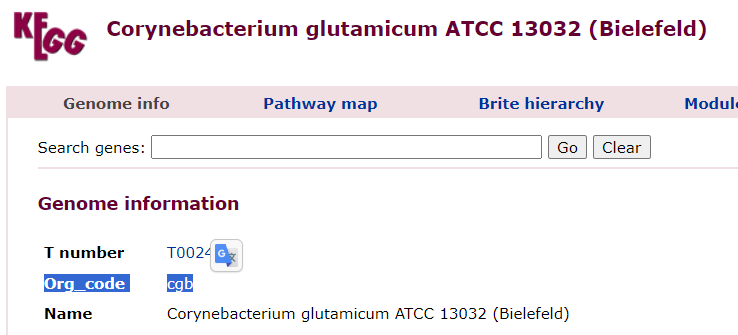

In [74]:
from bioservices import KEGG

k = KEGG()
k.organism = "cgb"

pathwayIds = k.pathwayIds
enzymeIds = k.enzymeIds
compoundIds = k.compoundIds

In [36]:
from bioservices import KEGG

k = KEGG()
gene_name = "brnE"

result = k.conv("genes", gene_name)

if result:
    kegg_id = result[0].split(":")[1]
    print(f"The KEGG ID for gene {gene_name} is {kegg_id}")
else:
    print(f"No KEGG ID found for gene {gene_name}")


ValueError: 
    Invalid syntax. target must be a KEGG ID or
    one of the allowed database. See documentation og :meth:`conv` for
    details

In [ ]:
result

In [32]:
genes = {"gluE":"",
         "brnE":"cg0315",
         "brnF":"cg0314",
         "lysP":""
        }

In [26]:
s = KEGG()
data = s.get("cgb04660")
dict_data = s.parse(data)['GENE']
type(dict_data)


WARNING [bioservices.KEGG:596]:  status is not ok with Bad Request
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


KeyError: 'GENE'

In [ ]:
tyoe

In [ ]:
for pathway_id in pathways:
    pathway_info = kegg.get(pathway_id)
    print(f"Pathway ID: {pathway_id}")
    print(pathway_info)
    print("\n" + "=" * 50 + "\n")  # Separating lines for better readability
